# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries:



In [4]:
# older versions of library (doesn't work in Google Colab)
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

# Installing the libraries with the latest version.
!pip install numpy==2.0.0 pandas==2.2.2 matplotlib==3.10.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [5]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [6]:
# importing Google Drive for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Most of the questions below use Pandas (dataframes - df)

In [7]:
# Write your code here to read the data

# defining the location where the data is stored
path = "/content/drive/MyDrive/Python AI Course/AI_Course_UTA/Course 1: Python Foundations/Module 1 - Python Foundations/foodhub_order.csv"

# loading the data into a Pandas dataframe
food = pd.read_csv(path)

# creating a copy of the data to avoid any changes to original data
data = food.copy()


In [9]:
# Write your code here to view the first 5 rows

# see the first 5 rows
data.head()

# data.tail() # -> last 5 rows
# data.sample(10) # -> random 10 rows

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [65]:
# Write your code here

data.shape

(1898, 11)

#### Observations: There are 1,898 rows and 9 columns in this dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [66]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   Revenue                1898 non-null   float64
 10  total_time             1898 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 163.2+ KB


#### Observations: There are a total of 9 columns: where 4 of them are of integer datatype, 1 is a float, and 4 are objects.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [67]:
# Write your code here

# find the total # of missing values
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0
Revenue,0


#### Observations: In this dataset, there are 0 missing values (none), which is a very good thing.  

However, if there were some missing values found in a column,  We can impute/replace these values with 3 methods (mean, median, or mode).


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [68]:
# Write your code here
data.describe()


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,Revenue,total_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749,3.248842,51.533720
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637,2.295598,6.833603
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,0.000000,35.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000,1.812000,47.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000,2.121000,52.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000,5.574375,56.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,8.852500,68.000000


#### Observations: Regarding the **food_prep_time**, it varies between 20 minutes and 35 minutes, with an average of 27.37 minutes.                                                             Also, the order cost varies between \$4.50 and \$35.40. The delivery time varies between 15 minutes and 33 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [69]:
# Write the code here
data['rating'].value_counts()


,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations: Out of a total 1,898 rating values, there are 736 (not given ratings), 588 (5-star ratings), 386 (4-stars), and 188 (3-stars).


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

order_id: 1898
customer_id: 1200
restaurant_name: 178
cuisine_type: 14
cost_of_the_order: 312
day_of_the_week: 2
rating: 4
food_preparation_time: 16
delivery_time: 19


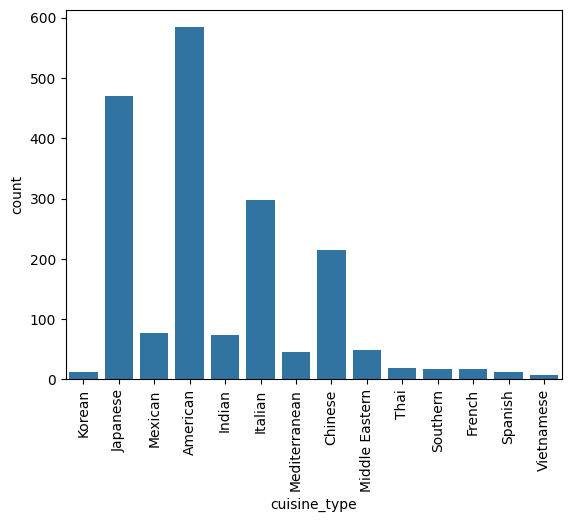

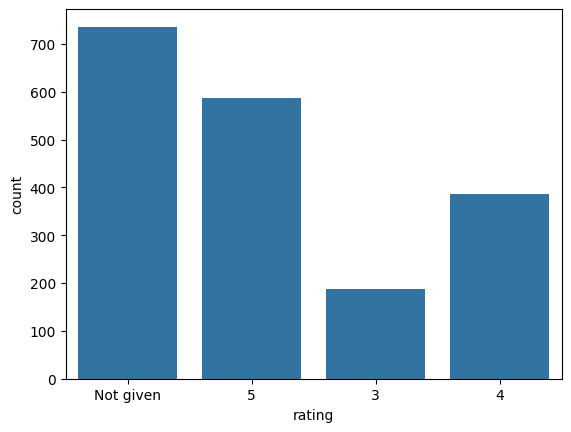

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


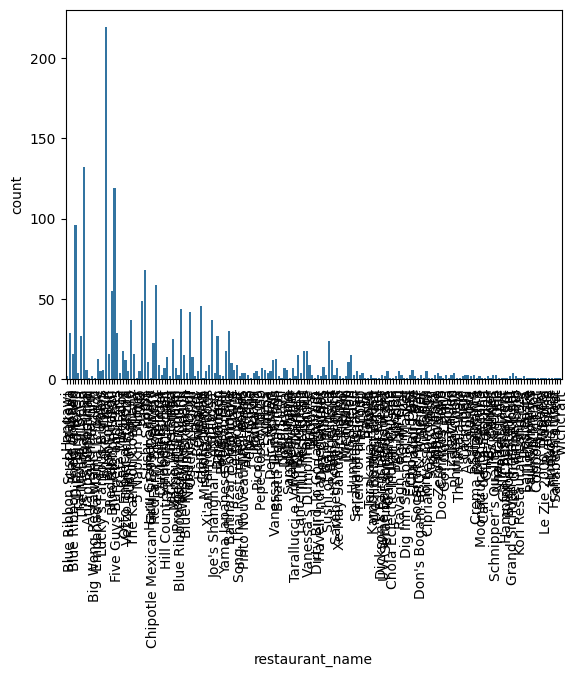

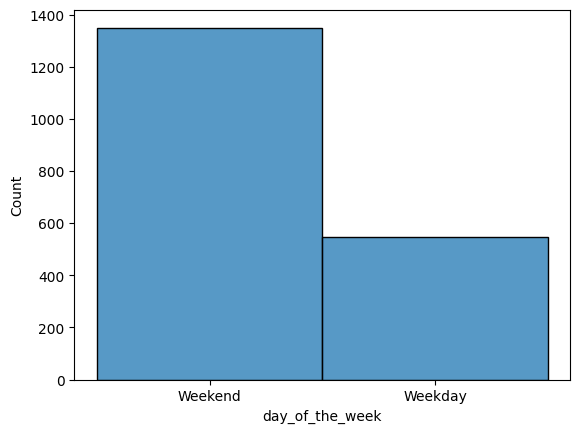

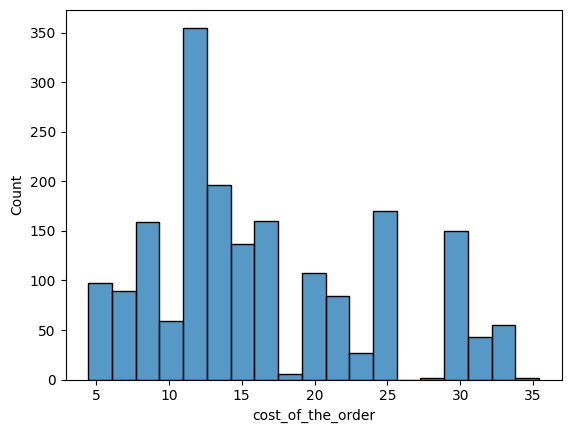

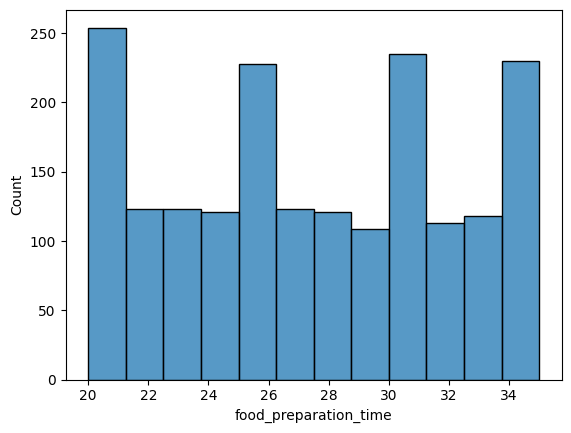

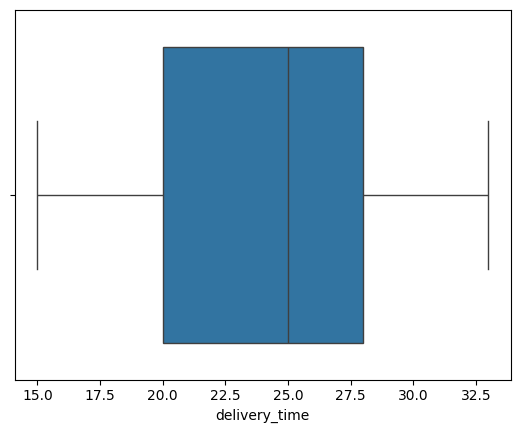

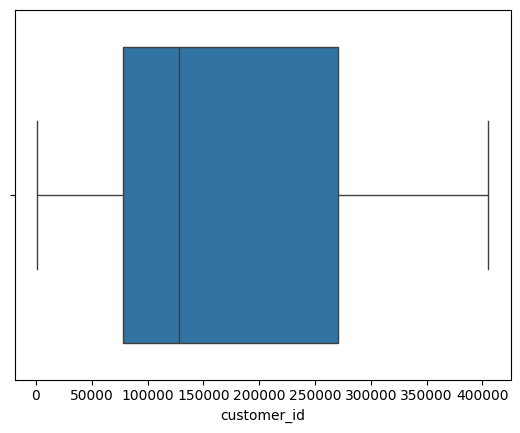

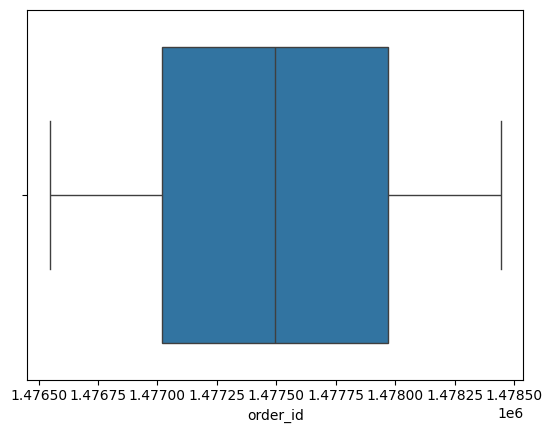

In [70]:
# Write the code here

# check the total # of unique values for all variables
feature_vars = ['order_id', 'customer_id', 'restaurant_name', 'cuisine_type', 'cost_of_the_order', 'day_of_the_week',
                'rating', 'food_preparation_time', 'delivery_time']

for var in feature_vars:
  print(f'{var}: {data[var].nunique()}')

sns.countplot(data=data,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=data,x='rating')
# plt.xticks(rotation=90)
plt.show()

sns.countplot(data=data, x='restaurant_name')
plt.xticks(rotation=90)
plt.show()

sns.histplot(data=data,x='day_of_the_week')
plt.show()

sns.histplot(data=data, x='cost_of_the_order')
plt.show()

sns.histplot(data=data, x='food_preparation_time')
plt.show()

sns.boxplot(data=data, x='delivery_time')
plt.show()

sns.boxplot(data=data, x='customer_id')
plt.show()

sns.boxplot(data=data, x='order_id')
plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [71]:
# Write the code here
data['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Rye House,1
Hiroko's Place,1
Frank Restaurant,1


#### Observations: The top 5 restaurants in terms of orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [72]:
# Get the list of cuisine types
print(data['cuisine_type'].unique())
print('-' * 50)

# Get the most popular cuisine on weekends
data_weekend = data[data['day_of_the_week'] == 'Weekend']
most_popular_cuisine = data_weekend['cuisine_type'].value_counts().idxmax()
print("The most popular cuisine is", most_popular_cuisine)

print('-' * 50)
# List of Popular Cuisines
list_pop_cuisine = data_weekend['cuisine_type'].value_counts()
print(list_pop_cuisine)

['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']
--------------------------------------------------
The most popular cuisine is American
--------------------------------------------------
cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Middle Eastern     32
Mediterranean      32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64


#### Observations: The most popular cuisine is **American food** with 415 orders. The other top cuisines are Japanese(335 orders), Italian(207 orders), and Chinese(163 orders).


### Read and understand the problems below carefully:

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [24]:
# Get the orders that cost above 20 dollars
data_more_than_20 = data[data['cost_of_the_order']>20]

# Get the number of total orders where the cost is above 20 dollars
print('Total num of orders that cost above 20 dollars are:', data_more_than_20.shape[0])

# Calculate percentage of the orders
percentage = (data_more_than_20.shape[0] / data.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

Total num of orders that cost above 20 dollars are: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations: The percentage of orders above 20 dollars is **29.24%**. That means most orders (71% of orders) are below 20 dollars, which is a good thing, because you want food to be cheaper and more accessible to all consumers.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [25]:
# Get the mean delivery time
mean_del_time = data['delivery_time'].mean()

print('The mean delivery time is:', round(mean_del_time, 2), 'minutes')

The mean delivery time is: 24.16 minutes


#### Observations: The mean order delivery time is: 24.16 minutes.



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [26]:
#  Get the counts of the top 3 customer_id
data['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations: The top 3 customers are as follows:
(cust_id: 52,832 with 13 orders),
(cust_id: 47,440 with 10 orders),
(cust_id: 83,287 with 9 orders)


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


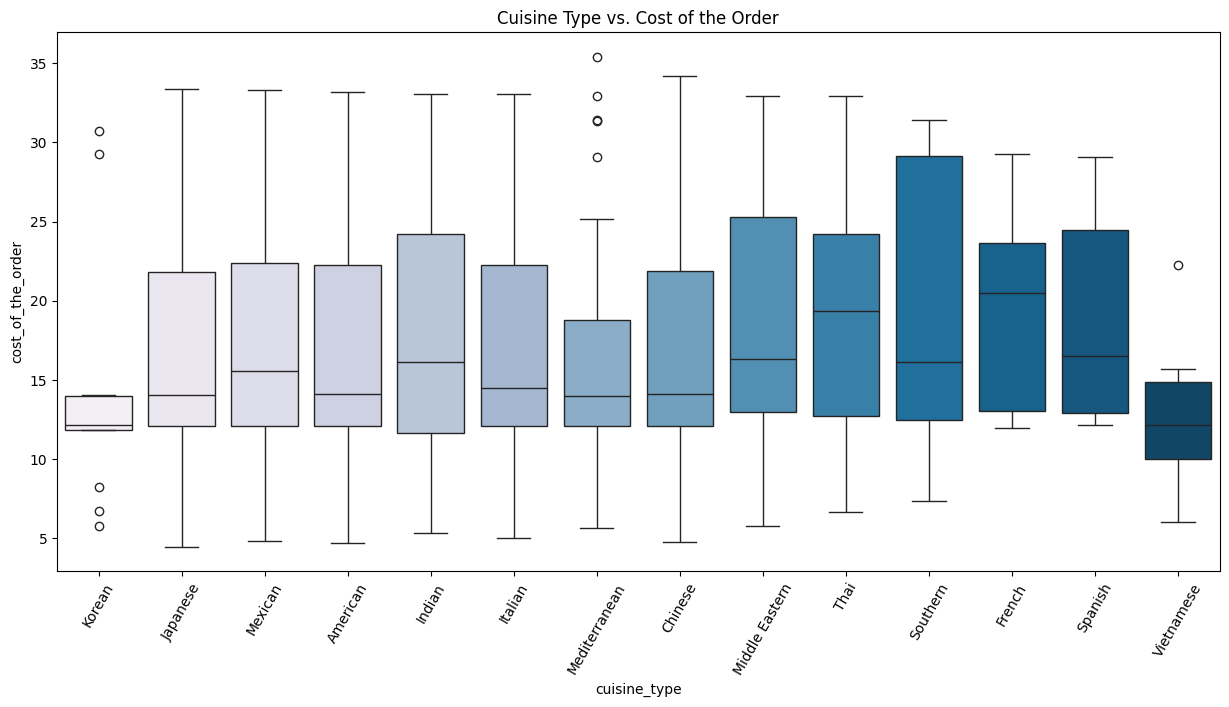

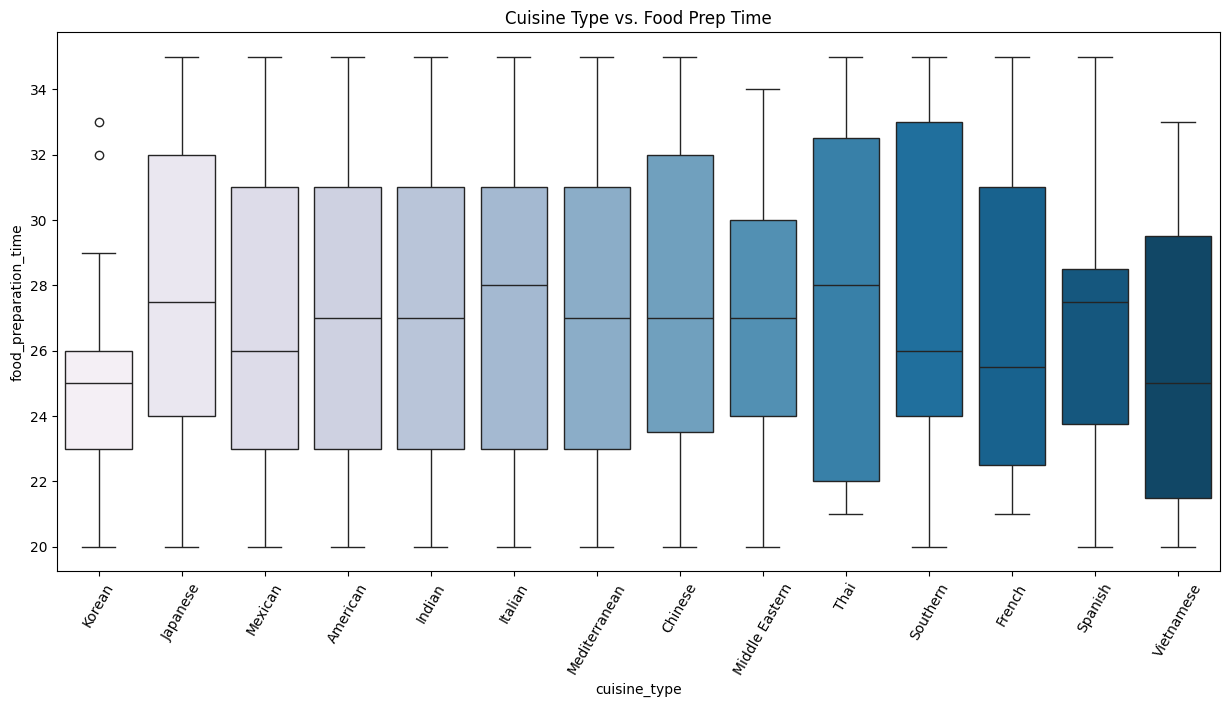

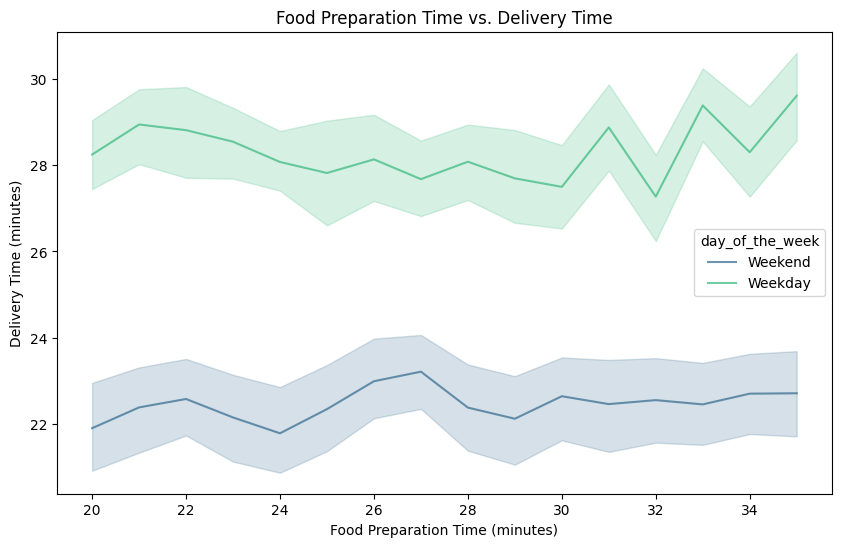

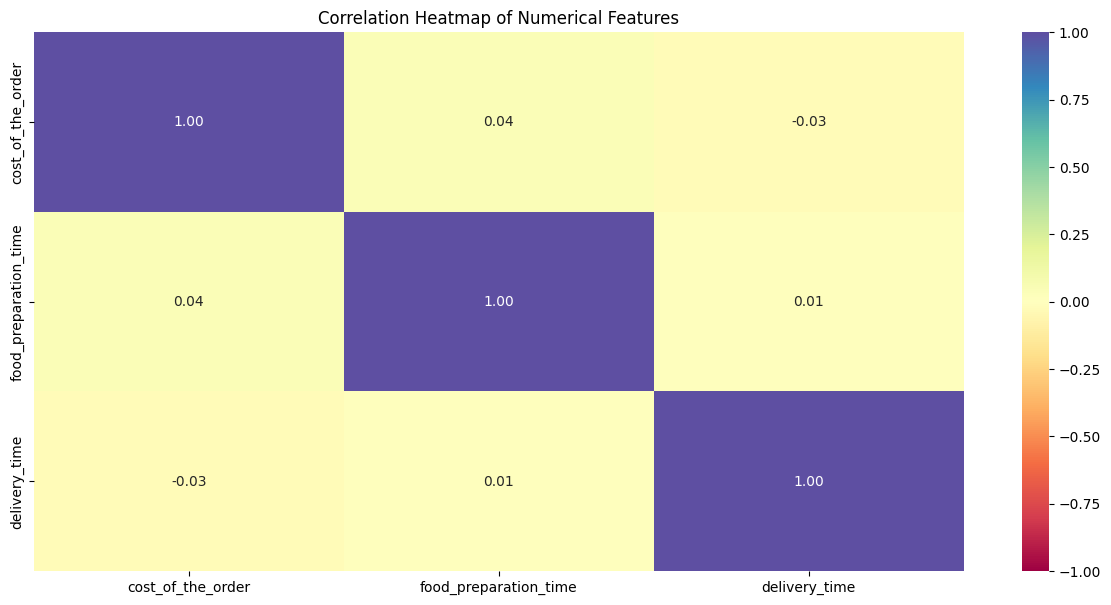

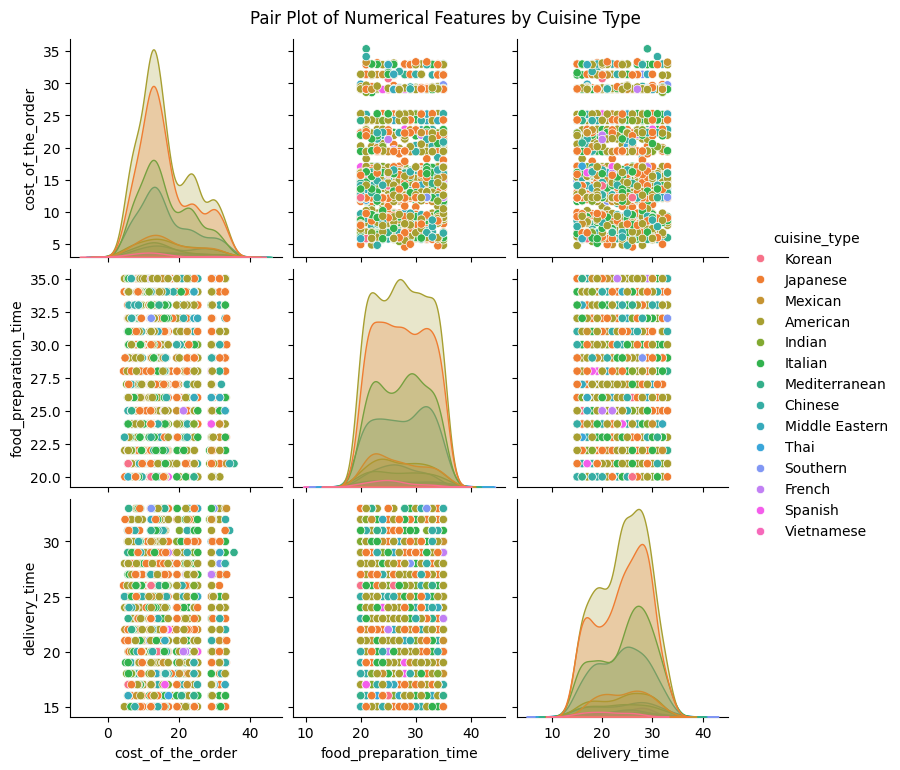

In [73]:
# The list of all feature_variables
feature_vars = ['order_id', 'customer_id', 'restaurant_name', 'cuisine_type', 'cost_of_the_order', 'day_of_the_week',
                'rating', 'food_preparation_time', 'delivery_time']

# Box Plot to explore the Relationship between cuisine_type and cost of the order
plt.figure(figsize=(15,7))
plt.title('Cuisine Type vs. Cost of the Order')
sns.boxplot(x="cuisine_type", y="cost_of_the_order", data=data, palette='PuBu', hue="cuisine_type")
plt.xticks(rotation=60)
plt.show()

# Box Plot between cuisine_type and food_prep_time
plt.figure(figsize=(15,7))
plt.title('Cuisine Type vs. Food Prep Time')
sns.boxplot(x="cuisine_type", y="food_preparation_time", data=data, palette='PuBu', hue="cuisine_type")
plt.xticks(rotation=60)
plt.show()

# Line Plot between Food Prep time and Delivery Time (with hue as day_of_the_week)
plt.figure(figsize=(10, 6))
sns.lineplot(x='food_preparation_time', y='delivery_time', hue='day_of_the_week', data=data, palette='viridis', alpha=0.7)
plt.title('Food Preparation Time vs. Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
plt.title('Correlation Heatmap of Numerical Features')
sns.heatmap(data[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# Pairplot:
sns.pairplot(data, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'], hue='cuisine_type', palette='husl', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Cuisine Type', y=1.02)
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [74]:
# Filter the rated restaurants
data_rated = data[data['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
data_rated['rating'] = data_rated['rating'].astype(int)

# Group the restaurants by their rating (based on the rating count, and their rating mean)
rating_grouped = data_rated.groupby('restaurant_name')['rating'].agg(['count', 'mean'])
promo_eligible_restaurants = rating_grouped[(rating_grouped['count'] > 50) & (rating_grouped['mean'] > 4)]

# Sort the results in descending order by 'mean'
promo_eligible_restaurants = promo_eligible_restaurants.sort_values(by='mean', ascending=False)

# Rename the columns
promo_eligible_restaurants.rename(columns={'count': 'rating count', 'mean': 'average rating'}, inplace=True)

# Print the final dataframe/table
print(promo_eligible_restaurants)


                           rating count  average rating
restaurant_name                                        
The Meatball Shop                    84        4.511905
Blue Ribbon Fried Chicken            64        4.328125
Shake Shack                         133        4.278195
Blue Ribbon Sushi                    73        4.219178


#### Observations: The restaurants that will get the promo offer (based on condition: rating count of more than 50 and the average rating should be greater than 4) are **a total of 4 restaurants**. Congrats to **The Meatball Shop** with the highest rating of all restaurants **(4.51)**!! Congrats to **Blue Ribbon Fried Chicken (4.32)**, **Shake Shack (4.27)**, and **Blue Ribbon Sushi (4.21)** as well!! **Incredible Job, guys!**


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [75]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x * 0.25
    elif x > 5:
        return x * 0.15
    else:
        return x * 0

data['Revenue'] = data['cost_of_the_order'].apply(compute_rev)  # Use the appropriate column name (e.g., 'cost') to compute the revenue
data.head()

# Get the total revenue and print it
total_rev = data['Revenue'].sum()  # Use the 'sum' function to calculate the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')


The net revenue is around 6166.3 dollars


#### Observations: The net revenue is around 6166.3 dollars.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [78]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
data['total_time'] = data['food_preparation_time'] + data['delivery_time']

# Find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
percentage = (data[data['total_time'] > 60].shape[0]/data.shape[0]) * 100
print("Percentage of orders that take more than 60 minutes to get delivered:", round(percentage, 2), '%')

Percentage of orders that take more than 60 minutes to get delivered: 10.54 %


#### Observations: Percentage of orders that take more than 60 minutes to get delivered: 10.54 %

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [79]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),'minutes')


# Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


In [80]:
data.shape

# There are now 11 columns instead of 9, because we added the last 2 columns (Revenue, total_time)
data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   Revenue                1898 non-null   float64
 10  total_time             1898 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 163.2+ KB


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


#### Observations: The mean delivery time on weekdays is around 28 minutes. The mean delivery time on weekends is around 22 minutes.


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusion and Recommendations:

### **Observations:** (what we saw from the dataset)

We analyzed **a dataset of nearly 2,000 online food orders** from the food delivery **company, FoodHub.** All the food orders come from **restaurants in New York** that offer a variety of different cuisines, including **the top 4 cuisines:** American, Japanese, Italian, and Chinese.

The data spanned over every day (Weekdays, Weekends) for the food orders in New York and were each given a rating from 1-5.

The main features of interest here are the cost_of_the_order and restaurant_name.

Our company is putting most of its money into food delivery services, so we should increase our engagement with those restaurants/cuisines that offer the most food orders and have a higher revenue. The following are those restaurants: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm, RedFarm Broadway, and RedFarm Hudson.

### **Conclusions:** (what we can summarize from the dataset)

We have been able to conclude that -  

1. The following restaurants (Shake Shack, Meatball Shop, etc.) have the highest # of food orders and revenue.
2. The most popular cuisines for our consumers are American, Japanese, Italian, and Chinese.
3. The demand for food orders has been increasing steadily over the year.
4. The number of food orders is higher on the weekdays as compared to weekends.
5. The food_prep_times and delivery_times so far are doing well, which is great for our app and consumers.
6. We need to further investigate why there are missing ratings for some of the restaurants, as higher ratings will convince consumers to get more food orders.



In [81]:
# print(data['restaurant_name'].value_counts())

# Checking the top 10 restaurants with the highest revenue generated:
data.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)


,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


### Recommendations to the Business:

* American and Japanese cuisine are the most mature market for FoodHub. Italian, Chinese, Mexican, and Indian cuisine show some potential.

* There has been a gradual increase in food orders over the last months and we need to keep up the momentum. The number of food orders are higher on weekdays, so restaurant availability must be ensured during these times.

* We need to keep suggesting on our app: the most popular restaurants to our consumers to drive up our revenue.

* More data should be taken on time of order (hour:min:secs), distance from restaurant to delivery site, etc. and a machine learning model can be built that can predict optimal pricing and time of food order, to alert our consumers when is the best time to get an order.

### Further Analysis that can be done:
* Dig deeper to explore the variation of restaurant demand, during working days and non-working days. You can combine Weekends+Holidays to be non-working days and weekdays to be the working days.

* Drop the restaurants that have no ratings and few food orders and then analyze the data to uncover more insights.

---